In [1]:
# Wymagane importy bibliotek
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array



# Pobranie danych IMDB Movie Review, ograniczając recenzje do
# 10000 najczęściej używanych słów
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

# Mapowanie na czytelne nazwy klas
class_names = ["Negative", "Positive"]


17464789/17464789 [==============================] - 0s 0us/step


####Stwórz mapę do konwersji zestawu danych IMDB na czytelne recenzje
Recenzje w zestawie danych IMDB zostały zakodowane jako sekwencja liczb całkowitych. Na szczęście zestaw danych zawiera również indeks do konwersji recenzji z powrotem do formy zrozumiałej dla człowieka

In [2]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
# Pobranie słownika z zestawu danych
word_index = tf.keras.datasets.imdb.get_word_index()

# Mapowanie "specjalnych" słów na ludzkie slowa
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# Odkodowanie recenzji
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


1641221/1641221 [==============================] - 0s 0us/step


## Analiza danych
Tutaj przyjrzymy się naszym danym z bliska. Ile słów zawierają nasze recenzje?

I jak wyglądają nasze recenzje w formie przetworzonej przez maszynę i czytelnej dla człowieka?

In [4]:
# Połączenie zestawów danych treningowych i testowych
allreviews = np.concatenate((x_train, x_test), axis=0)

# Długości recenzji dla całego zestawu danych
print("Maksymalna długość recenzji: {}".format(len(max((allreviews), key=len))))
print("Minimalna długość recenzji: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Średnia długość recenzji: {}".format(np.mean(result)))
print("Mediana długość recenzji: {}".format(np.median(result)))

# Wyświetlenie recenzji i odpowiadającej jej klasy z zestawu danych.
# Zmień numer, aby wybrać inną recenzję.
print("")
print("Recenzja w formacie dla maszyn")
print("  Tekst recenzji: " + str(x_train[60]))
print("  Sentyment recenzji: " + str(y_train[60]))

# Wyświetlenie recenzji i odpowiadającej jej klasy w ludzkiej formie.
# Zmień numer, aby wybrać inną recenzję.
print("")
print("Recenzja w formacie dla człowieka")
print("  Tekst recenzji: " + decode_review(x_train[60]))
print("  Sentyment recenzji: " + class_names[y_train[60]])


Maksymalna długość recenzji: 2494
Minimalna długość recenzji: 7
Średnia długość recenzji: 234.75892
Mediana długość recenzji: 176.0

Recenzja w formacie dla maszyn
  Tekst recenzji: [1, 13, 219, 14, 33, 4, 2, 22, 1413, 12, 16, 373, 175, 2711, 1115, 1026, 430, 939, 16, 23, 2444, 25, 43, 697, 89, 12, 16, 170, 8, 130, 262, 19, 32, 4, 665, 7, 4, 2, 322, 5, 4, 1520, 7, 4, 86, 250, 10, 10, 4, 249, 173, 16, 4, 3891, 6, 19, 4, 167, 564, 5, 564, 1325, 36, 805, 8, 216, 638, 17, 2, 21, 25, 100, 376, 507, 4, 2110, 15, 79, 125, 23, 567, 13, 2134, 233, 36, 4852, 2, 5, 81, 1672, 10, 10, 92, 437, 129, 58, 13, 69, 8, 401, 61, 1432, 39, 1286, 46, 7, 12]
  Sentyment recenzji: 0

Recenzja w formacie dla człowieka
  Tekst recenzji: <START> i saw this at the <UNKNOWN> film festival it was awful every clichéd violent rich boy fantasy was on display you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br br the worst part was the q a with the

### Przetwarzanie danych
Musimy upewnić się, że nasze recenzje są jednorodnej długości. Jest to ważne dla parametrów LSTM.

Niektóre recenzje będą musiały zostać przycięte, podczas gdy inne będą musiały zostać wypełnione.

In [5]:
# Długość recenzji
review_length = 200

# Padding / truncation recenzji
x_train = sequence.pad_sequences(x_train, maxlen = review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

# Sprawdzenie rozmiaru zbiorów danych. Dane recenzji w zestawach treningowym i
# testowym powinny zawierać 25000 recenzji po 500 liczb każda. Dane klasowe
# powinny zawierać 25000 wartości, jedną dla każdej recenzji. Wartości klasowe
# wynoszą 0 lub 1, w zależności od tego, czy recenzja jest negatywna czy
# pozytywna.
print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))

# Uwaga! Padding jest dodawany na początku recenzji, nie na końcu
print("")
print("Tekst recenzji w formacie dla człowieka (po paddingu): " + decode_review(x_train[60]))


Shape Training Review Data: (25000, 200)
Shape Training Class Data: (25000,)
Shape Test Review Data: (25000, 200)
Shape Test Class Data: (25000,)

Tekst recenzji w formacie dla człowieka (po paddingu): <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> i saw this at the <UNKNOWN> film festival it was awful every clichéd violent rich boy fantasy was on display you just knew how it was going to end especially with all the shots of the <UNKNOWN> wife and the rape of the first girl br

##Utwórz i skompiluj rekurencyjną sieć neuronową LSTM

In [6]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
from keras.utils import Sequence


In [7]:
# Tworzenie pustego stosu. Będziemy korzystać z niego do budowania naszej sieci, warstwa po warstwie.
model = tf.keras.models.Sequential()

# Warstwa osadzeń (Embedding Layer) zapewnia przestrzenne odwzorowanie (lub osadzenie słów) wszystkich poszczególnych słów w naszym zestawie treningowym. Słowa bliskie sobie dzielą kontekst i/lub znaczenie. To przestrzenne odwzorowanie jest uczone podczas procesu treningu.
model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size,
        output_dim = 32,
        input_length = review_length
    )
)

# Warstwy Dropout zapobiegają przeuczaniu (overfitting) i zmuszają model do nauki wielu reprezentacji tego samego zestawu danych przez losowe wyłączanie neuronów w fazie nauki.
model.add(
    tf.keras.layers.Dropout(
        rate=0.2
    )
)

#Warstwa LSTM
model.add(
    tf.keras.layers.LSTM(
        units=16,
        return_sequences=True
    )
)


#Warstwa LSTM
model.add(
    tf.keras.layers.LSTM(
        units=16
    )
)


# Dodajemy drugą warstwę Dropout o tym samym celu, co pierwsza.
model.add(
    tf.keras.layers.Dropout(
        rate=0.5
    )
)


# Wszystkie jednostki LSTM są połączone z pojedynczym węzłem w warstwie gęstej (Dense Layer). Funkcja aktywacji sigmoidalna określa wynik z tego węzła - wartość między 0 a 1. Bliskie 0 wskazuje na negatywną recenzję. Bliskie 1 wskazuje na pozytywną recenzję.
model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

# Kompilacja modelu
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

# Wyświetlenie podsumowania struktury modelu
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 200, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 200, 16)           3136      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 325,265
Trainable params: 325,265
Non-trai

## Wizualizacja modelu

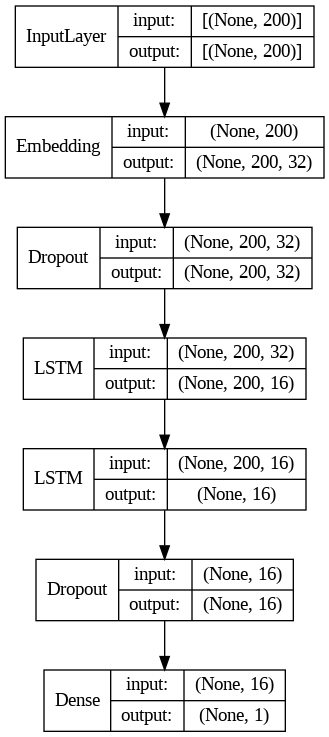

In [8]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

## Wytrenuj LSTM

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Definiujemy ścieżkę i nazwy plików punktu kontrolnego
sciezka_do_pliku = "training/cp.ckpt"
folder = os.path.dirname(sciezka_do_pliku)

# Tworzymy funkcję zwrotną, która zapisuje wagi modelu
zapis_wag = ModelCheckpoint(filepath=sciezka_do_pliku,
                              save_weights_only=True,
                              verbose=1)

# Definiujemy wczesne zatrzymanie
wczesne_zatrzymanie = EarlyStopping(monitor='val_loss', patience=3)

# Trenujemy model z nową funkcją zwrotną
historia = model.fit(
   x_train,
   y_train,
   batch_size=256,
   epochs=2,
   validation_split=0.3,
   verbose=1,
   callbacks=[zapis_wag, wczesne_zatrzymanie] # Dodajemy funkcje zwrotne do treningu
)


Epoch 1/2
69/69 [==============================] - ETA: 0s - loss: 0.6250 - accuracy: 0.6507
Epoch 1: saving model to training/cp.ckpt
69/69 [==============================] - 27s 261ms/step - loss: 0.6250 - accuracy: 0.6507 - val_loss: 0.4466 - val_accuracy: 0.8037
Epoch 2/2
69/69 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.8561
Epoch 2: saving model to training/cp.ckpt
69/69 [==============================] - 13s 182ms/step - loss: 0.3668 - accuracy: 0.8561 - val_loss: 0.3715 - val_accuracy: 0.8433


In [ ]:
# Załadowanie wag do modelu
model.load_weights('training/cp.ckpt')

## Oceń model z danymi testowymi i wyświetl wyniki

In [ ]:
# Otrzymanie predykcji modelu dla danych testowych
from sklearn.metrics import classification_report

# Przewidywane klasy dla danych testowych
predicted_classes = model.predict(x_test)

# Wybór klasy o najwyższym prawdopodobieństwie
predicted_classes = np.argmax(predicted_classes,axis=1)

# Wypisanie raportu klasyfikacji
print(classification_report(y_test, predicted_classes, target_names=class_names,zero_division=1))


782/782 [==============================] - 6s 7ms/step
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67     12500
    Positive       1.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.75      0.50      0.33     25000
weighted avg       0.75      0.50      0.33     25000



## Wyświetlanie niepoprawnych predykcji
Spójrzmy na niektóre z niepoprawnie sklasyfikowanych recenzji. W celu ułatwienia ich czytania usuniemy wypełnienie.

In [ ]:
predicted_classes_reshaped = np.reshape(predicted_classes, 25000)

# Indeksy błędnie sklasyfikowanych próbek
incorrect = np.nonzero(predicted_classes_reshaped!=y_test)[0]

# Wybieramy pierwszych 20 błędnie sklasyfikowanych recenzji
for j, incorrect in enumerate(incorrect[0:20]):

    # Przewidywana klasa
    predicted = class_names[predicted_classes_reshaped[incorrect]]

    # Rzeczywista klasa
    actual = class_names[y_test[incorrect]]

    # Odczytanie recenzji
    human_readable_review = decode_review(x_test[incorrect])

    # Wyświetlenie informacji o błędnej klasyfikacji
    print("Nieprawidłowo sklasyfikowana recenzja testowa ["+ str(j+1) +"]")
    print("Recenzja testowa #" + str(incorrect)  + ": Przewidywana ["+ predicted + "] Rzeczywista ["+ actual + "]")
    print("Tekst recenzji: " + human_readable_review.replace("<PAD> ", ""))
    print("")


Nieprawidłowo sklasyfikowana recenzja testowa [1]
Recenzja testowa #1: Przewidywana [Negative] Rzeczywista [Positive]
Tekst recenzji: psychological <UNKNOWN> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNKNOWN> moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual <UNKNOWN> and desperation be patient <UNKNOWN> up the atmosphere and pay attention to the wonderfully written script br br i praise robert altman this is one of his many films that deals with unconventional fascinating subject matter this fil

In [ ]:
# Pozytywna recenzja w języku angielskim
review = "This movie is a masterpiece! I couldn't take my eyes off the screen for a moment. The actors were amazing and the special effects were mind-blowing. I highly recommend it!"

# Kodowanie recenzji (zastąpienie słów liczbami)
tmp = []
for word in review.split(" "):
    tmp.append(word_index[word])

# Upewnienie się, że recenzja ma długość 500 słów (poprzez dopełnianie lub skracanie)
tmp_padded = sequence.pad_sequences([tmp], maxlen=review_length)

# Wykonanie przetworzonej recenzji na wytrenowanym modelu
rawprediction = model.predict(array([tmp_padded][0]))[0][0]

# Zaokrąglenie przewidywanej wartości
prediction = int(round(rawprediction))

# Test modelu i wyświetlenie wyniku
print("Recenzja: " + review)
print("Nieprzetworzona predykcja: " + str(rawprediction))
print("Przewidywana klasa: " + class_names[prediction])


KeyError: ignored